In [1]:
!pip install pandas pykeen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


In [2]:
!pip install pandas pykeen

In [3]:
from google.colab import files
#uploaded = files.upload()
#extracted_tripletsRebel-2000.csv

In [4]:
import pandas as pd
from pykeen.triples import TriplesFactory
import numpy as np
from pykeen.pipeline import pipeline
from pykeen.evaluation import RankBasedEvaluator
import pickle

df = pd.read_csv('KG_Standford_2k.csv', header=None, names=['head', 'relation', 'tail'])

df['head'] = df['head'].astype(str)
df['relation'] = df['relation'].astype(str)
df['tail'] = df['tail'].astype(str)

triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['head', 'relation', 'tail']].values,
)

training, testing, validation = triples_factory.split([0.8, 0.1, 0.1])


INFO:pykeen.utils:Using opt_einsum
INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [99951, 34115, 34115]


In [5]:
import pandas as pd
from pykeen.triples import TriplesFactory
import numpy as np
from pykeen.pipeline import pipeline
from pykeen.evaluation import RankBasedEvaluator
import pickle

#Rebel>
#csv_file = '/content/KGRebel-ds2k.csv'
csv_file = '/content/KG_Standford_2k_meta.csv'

df = pd.read_csv(csv_file)
df = df.drop(index=0)
df.columns = ['head', 'relation', 'tail', 'title', 'label']
#StandFord>
#csv_file = '/content/KG_Standford_2k.csv'
#df = pd.read_csv(csv_file)
#df = df.drop(index=0)
##df.columns = ['head', 'relation', 'tail', 'title', 'label']

df['head'] = df['head'].astype(str)
df['relation'] = df['relation'].astype(str)
df['tail'] = df['tail'].astype(str)

triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['head', 'relation', 'tail']].values,
)

training, testing, validation = triples_factory.split([0.8, 0.1, 0.1])


INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [50910, 27447, 27448]


In [8]:
with open('training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=500),  # Dimensiones de embeddings
    optimizer_kwargs=dict(lr=0.001),  # Tasa de aprendizaje
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),
    loss="marginranking",
    loss_kwargs=dict(margin=2.0),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

KeyboardInterrupt: 

In [ ]:
evaluator = RankBasedEvaluator()
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

In [ ]:

# Guardar el modelo entrenado
model = result.model
output_dir = '/content/Tesis-RAGS/'
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
os.chdir(output_dir)
result.save_model('model_RotatE_Stand2Kmeta.pkl')

print("Modelo y training guardados exitosamente.")

rot10

In [ ]:
with open('training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=500),  # Dimensiones de embeddings
    optimizer_kwargs=dict(lr=0.001),  # Tasa de aprendizaje
    training_kwargs=dict(num_epochs=500, use_tqdm_batch=False),
    loss="marginranking",
    loss_kwargs=dict(margin=2.0),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/500 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 9.70s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 9.91s seconds


Hits@1: 0.19588599085775746
Hits@3: 0.2721161602581339
Hits@5: 0.2979295509545577
Hits@10: 0.33705297122882494
Mean Reciprocal Rank: 0.24524733424186707


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

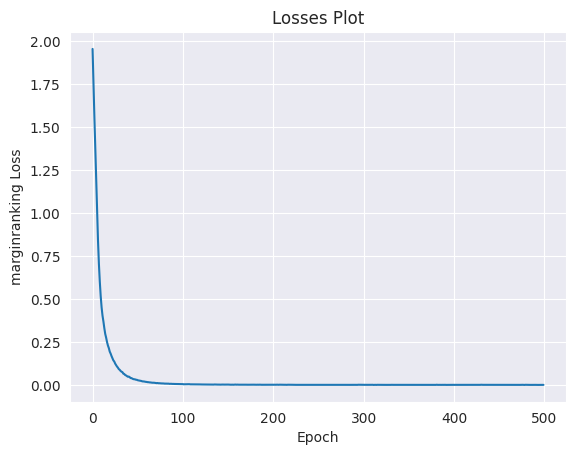

In [ ]:
evaluator = RankBasedEvaluator()
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

rot9

In [ ]:
with open('training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=500),  # Dimensiones de embeddings
    optimizer_kwargs=dict(lr=0.001),  # Tasa de aprendizaje
    training_kwargs=dict(num_epochs=500, use_tqdm_batch=False),
    loss="marginranking",
    loss_kwargs=dict(margin=0.5),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/500 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 9.67s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 10.02s seconds


Hits@1: 0.08093573541274536
Hits@3: 0.11898359774132831
Hits@5: 0.13726808281796182
Hits@10: 0.16254369454154344
Mean Reciprocal Rank: 0.109181672334671


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

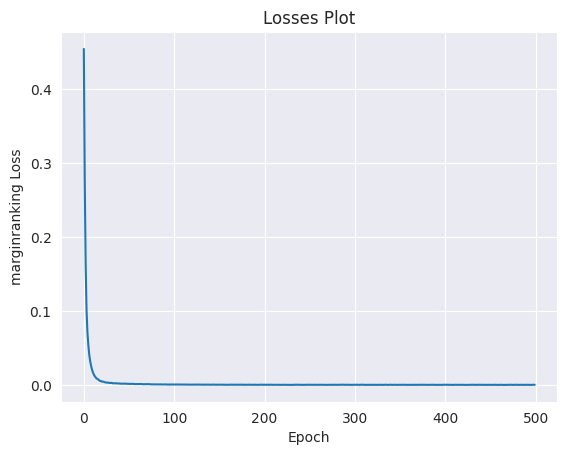

In [ ]:
evaluator = RankBasedEvaluator()
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

Rot8

In [ ]:
with open('training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=500),  # Dimensiones de embeddings
    optimizer_kwargs=dict(lr=0.01),  # Tasa de aprendizaje
    training_kwargs=dict(num_epochs=400, use_tqdm_batch=False),
    loss="marginranking",  # Usar marginranking
    loss_kwargs=dict(margin=1.0),  # Configurar el margen aquí
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/400 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 9.70s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 10.03s seconds


Hits@1: 0.12019360043022317
Hits@3: 0.15864479698843775
Hits@5: 0.17679483732186071
Hits@10: 0.2030115622479161
Mean Reciprocal Rank: 0.14850184321403503


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

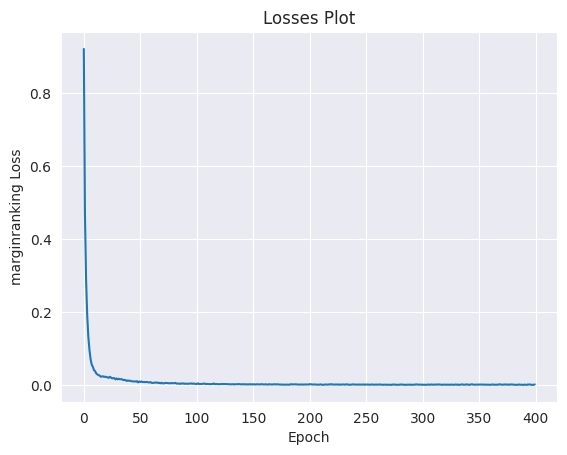

In [ ]:
evaluator = RankBasedEvaluator()
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

Rot7

In [ ]:
with open('training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=800),
    optimizer_kwargs=dict(lr=0.001),
    training_kwargs=dict(num_epochs=900, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/900 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 15.22s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 15.35s seconds


Hits@1: 0.12772250605001345
Hits@3: 0.1820381823070718
Hits@5: 0.20838935197633773
Hits@10: 0.24065609034686744
Mean Reciprocal Rank: 0.16601596772670746


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

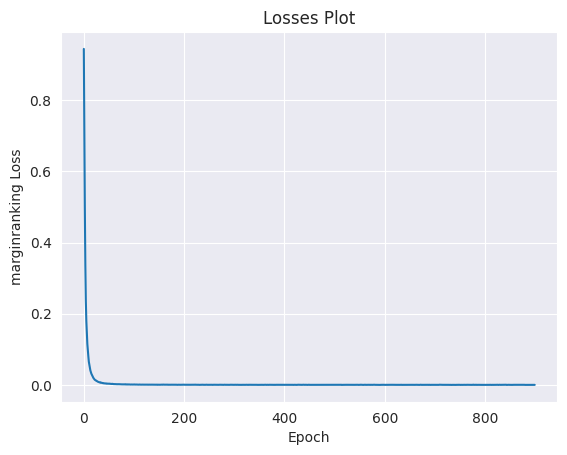

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

In [ ]:

# Guardar el modelo entrenado
model = result.model
output_dir = '/content/Tesis-RAGS/'
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
os.chdir(output_dir)
result.save_model('model_RotatE_Stand2K.pkl')

print("Modelo y training guardados exitosamente.")

Modelo y training guardados exitosamente.


Rot6

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=450),
    optimizer_kwargs=dict(lr=0.001),
    training_kwargs=dict(num_epochs=400, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/400 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 15.25s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 15.37s seconds


Hits@1: 0.12570583490185533
Hits@3: 0.18351707448238774
Hits@5: 0.20879268620596936
Hits@10: 0.2422694272653939
Mean Reciprocal Rank: 0.16543246805667877


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

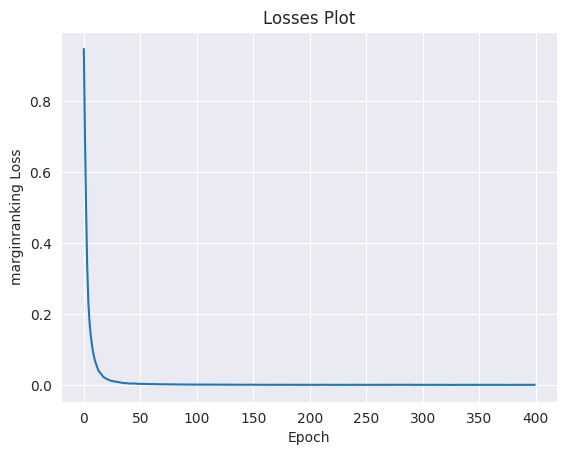

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

Rt4

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=500),
    optimizer_kwargs=dict(lr=0.001),
    training_kwargs=dict(num_epochs=400, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/400 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 9.67s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 9.90s seconds


Hits@1: 0.12597472438827642
Hits@3: 0.18096262436138746
Hits@5: 0.20812046248991664
Hits@10: 0.24186609303576231
Mean Reciprocal Rank: 0.16505835950374603


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

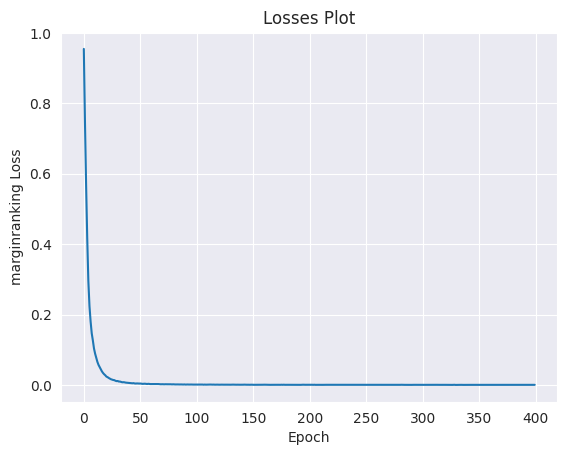

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

#R1

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=500),
    optimizer_kwargs=dict(lr=0.01),
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/117 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.76s seconds


In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

## t2

In [ ]:
with open('2training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=70),
    optimizer_kwargs=dict(lr=0.01),
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.79s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.10s seconds


Hits@1: 0.08147351438558752
Hits@3: 0.11306802904006454
Hits@5: 0.13135251411669804
Hits@10: 0.1528636730303845
Mean Reciprocal Rank: 0.10587019473314285


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

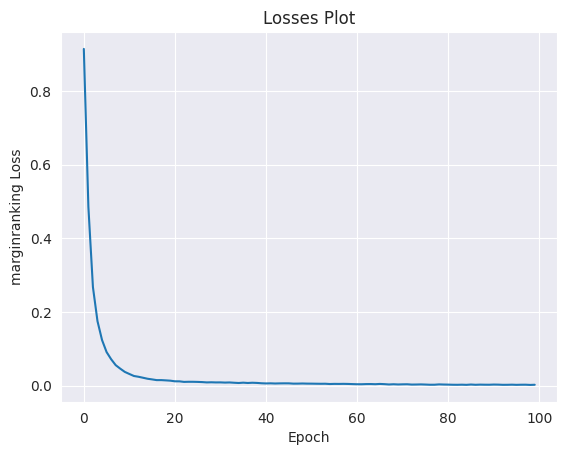

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

## t3

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=500),
    optimizer_kwargs=dict(lr=0.01),
    training_kwargs=dict(num_epochs=200, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.24s seconds


In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

## t4

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=150),
    optimizer_kwargs=dict(lr=0.0001),
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 3.29s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 3.65s seconds


Hits@1: 0.011158913686474859
Hits@3: 0.02514116698037107
Hits@5: 0.03737563861253025
Hits@10: 0.0578112395805324
Mean Reciprocal Rank: 0.027910906821489334


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

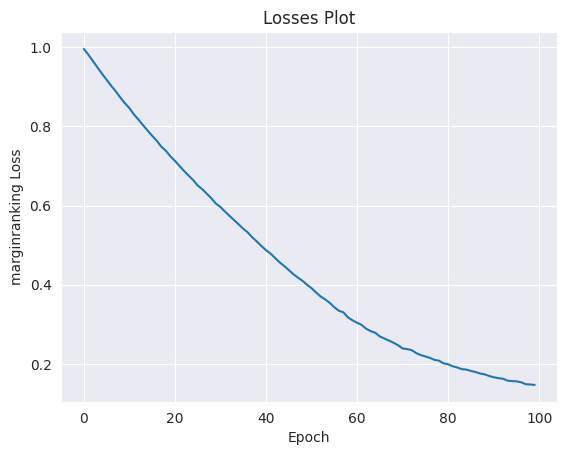

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

## t5

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=50),
    optimizer_kwargs=dict(lr=0.001),
    training_kwargs=dict(num_epochs=70, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/70 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.44s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.68s seconds


Hits@1: 0.02567894595321323
Hits@3: 0.043828986286636194
Hits@5: 0.05498789997311105
Hits@10: 0.07394460876579725
Mean Reciprocal Rank: 0.0439927913248539


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

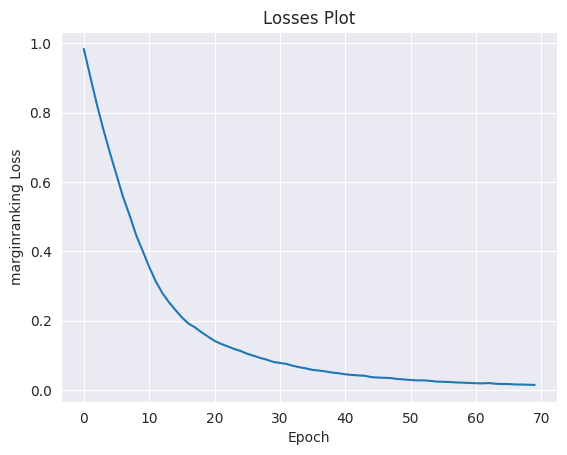

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

## t6

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=75),
    optimizer_kwargs=dict(lr=0.01),
    training_kwargs=dict(num_epochs=50, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.86s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.19s seconds


Hits@1: 0.07623016940037644
Hits@3: 0.10311911804248454
Hits@5: 0.11817692928206507
Hits@10: 0.1402258671685937
Mean Reciprocal Rank: 0.09807033091783525


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

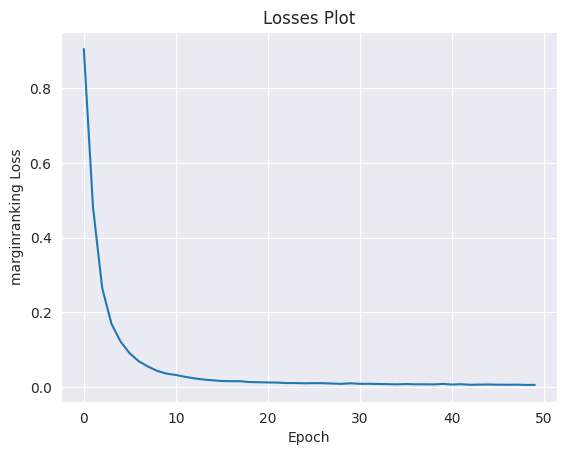

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

In [ ]:
with open('3training_triples_RotatEStand2K.pkl', 'wb') as f:
    pickle.dump(training, f)

result = pipeline(
    model ='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=50),
    optimizer_kwargs=dict(lr=0.05),
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),
    device="cuda",
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.45s seconds


Evaluating on cuda:0:   0%|          | 0.00/3.72k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.69s seconds


Hits@1: 0.07233127184727077
Hits@3: 0.0993546652325894
Hits@5: 0.11279913955364346
Hits@10: 0.13202473783275073
Mean Reciprocal Rank: 0.09326574206352234


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

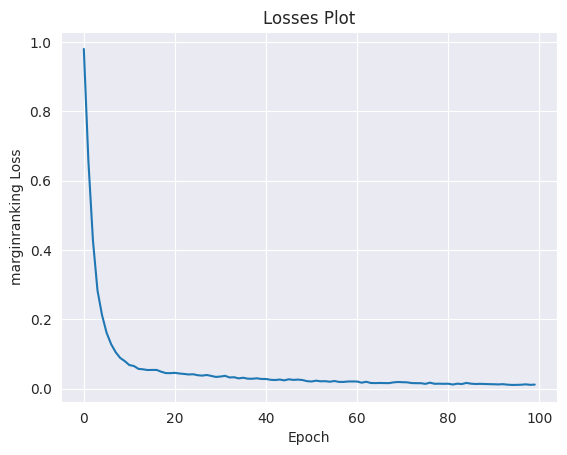

In [ ]:
# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

# Save

In [ ]:

# Guardar el modelo entrenado
model = result.model
output_dir = '/content/Tesis-RAGS/'
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
os.chdir(output_dir)
result.save_model('model_RotatE_Stand2K.pkl')

print("Modelo y training guardados exitosamente.")

Modelo y training guardados exitosamente.
